# Inital Setup's for analysis

# Objectives

## My analysis will be more focussed towards Indian Developers

1. General things
    - To analyse the amount of developers from India Participating in this survery
    - To analyse the proffession, interest and background of those developers
    - To analyse the field of work of Indian developers
    - Distribution of student among India developers

2. Demographics and education
    - What is the age distribution of Indian developers?
    - Education background of Indian devs, from where they learned to code
    - Means of documentation for Indian devs

3. Technology and Skills
    - What programming languages, tools, and frameworks are most popular among Indian developers?
    - Which technologies are Indian developers most interested in learning?
    - What percentage of Indian developers work on open-source projects?
    - Most Used Web Framework withing India Developers

4. Professional Life
    - What is the average work experience of developers in India?
    - What is the distribution of annual compensation for Indian developers according to their age?
    - Make a histogram on the compansesation of India developers

5. Technology and Skills
    - What programming languages, tools, and frameworks are most popular among Indian developers?
    - Which technologies are Indian developers most interested in learning?
    - What percentage of Indian developers work on open-source projects?
    - Most Used Web Framework withing India Developers

6. AI related
    - Distribution of utilisation of AI by Indian developers (on type of work done by AI)
    - Sentiment of Indian Developers who thinks AI is threat, on the basis of their workex.

7. Operating System
    - To compare the level of experience of different operating system users
    - To see the distribution of total number of os users in pie chart

8. DevTools
    - Make a Bar chart showing how many people uses which tool to write their code
    - Make a line chart of DevTools vs Average salary of devs using them


### Loading required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import matplotlib

In [3]:
df = pd.read_csv("data/survey_results_public.csv")
schema_df = pd.read_csv("data/survey_results_schema.csv")

### Filtering rows which concerns us i.e. (Data of India users)

In [4]:
df = df.loc[df.Country == "India"]

# Some Data Cleaning

In [5]:
# Remoing not so usefull columns
df.drop("Check", axis=1, inplace=True)

In [6]:
df.loc[(df.Employment.str.contains("Student, full-time")) & (~df.RemoteWork.isnull())]
df.loc[df["RemoteWork"].isnull(), "RemoteWork"] = "Not Intrested"
df.columns
columns_to_drop = df.columns[df.columns.get_loc("JobSatPoints_1") :]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
columns_to_drop = [col for col in df.columns if "Knowledge_" in col]
df.drop(columns=columns_to_drop, inplace=True)

In columns where the survery took input about programming language currently using, admired etc are ";" separated string of names of programming language

- So for each such type of column i will make a list out of strings using ";" as a delimiter 
- then i will explode all such columns one by one two avoid alignment issues
- then store them as series in different variables
- and then use those series to perform different operations

In [8]:
# language_have_worked_with = df["LanguageHaveWorkedWith"].str.split(";")
# language_want_to_work_with = df["LanguageWantToWorkWith"].str.split(";")
# language_admired = df["LanguageAdmired"].str.split(";")

series_of_languages_have_worked_with = (
    df.dropna(subset=["LanguageHaveWorkedWith"])["LanguageHaveWorkedWith"]
    .str.split(";")
    .explode()
)
series_of_languages_want_to_work_with = (
    df.dropna(subset=["LanguageWantToWorkWith"])["LanguageWantToWorkWith"]
    .str.split(";")
    .explode()
)
series_of_languages_admire_to_work_with = (
    df.dropna(subset=["LanguageAdmired"])["LanguageAdmired"].str.split(";").explode()
)

# series_of_languages_admire_to_work_with.value_counts()
# series_of_languages_want_to_work_with.value_counts()
# series_of_languages_have_worked_with.value_counts()[:10].plot.bar()

In [9]:
# filling na's in YearsCode and YearsCodePro column
# handling strings
df.loc[:, "YearsCode"] = pd.to_numeric(df["YearsCode"], errors="coerce")
df.loc[:, "YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# i'm not handling the case where both the column are NaN's
df.loc[:, "YearsCode"] = df.apply(
    lambda row: row["YearsCodePro"] if pd.isna(row["YearsCode"]) else row["YearsCode"],
    axis=1,
)
df.loc[:, "YearsCodePro"] = df.apply(
    lambda row: row["YearsCode"]
    if pd.isna(row["YearsCodePro"])
    else row["YearsCodePro"],
    axis=1,
)

df.loc[:, "YearsCode"] = df.apply(
    lambda row: 0
    if pd.isna(row["YearsCode"]) and pd.isna(row["YearsCodePro"])
    else row["YearsCode"],
    axis=1,
)
df.loc[:, "YearsCodePro"] = df.apply(
    lambda row: 0
    if pd.isna(row["YearsCodePro"]) and pd.isna(row["YearsCode"])
    else row["YearsCodePro"],
    axis=1,
)

print(df.YearsCode)
df.YearsCodePro

17        6.0
58        4.0
75        4.0
89        2.0
96       11.0
         ... 
65339     4.0
65383     9.0
65413     3.0
65415     4.0
65428     4.0
Name: YearsCode, Length: 4231, dtype: object


17       3.0
58       4.0
75       4.0
89       2.0
96       7.0
        ... 
65339    2.0
65383    9.0
65413    3.0
65415    4.0
65428    7.0
Name: YearsCodePro, Length: 4231, dtype: object

In [10]:
# discarding YearsCodePro and only keeping YearsCode
# first we will keep
#   store the max of both in YearsCode


df.loc[:, "YearsCode"] = df.apply(
    lambda row: max(row["YearsCodePro"], row["YearsCode"]), axis=1
)

# dropping YearsCodePro

df.drop(columns=["YearsCodePro"], inplace=True)

In [11]:
df.to_csv("/tmp/data_dav.csv")

Resetting Index of our dataframe

In [12]:
new_index = df.reset_index().index + 1
df.set_index(new_index, inplace=True)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry
1,18,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Coding sessions (live or recorded);How-t...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",Not Intrested,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76,I am learning to code,25-34 years old,"Not employed, but looking for work",Not Intrested,NaN,Some college/university study without earning ...,Online Courses or Certification;Coding Bootcamp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,I am learning to code,25-34 years old,"Employed, full-time",In-person,Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc);Online...",NaN,NaN,...,Never,1-2 times a week,Never,60-120 minutes a day,Less than 15 minutes a day,None of these,Observability tools;Knowledge sharing community,Hybrid (on-prem and cloud),AI-powered search (free),Higher Education
5,97,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,Amount of technical debt;Tracking my work;Show...,DevOps function;Developer portal or other cent...,Cloud only (single or multi-cloud),A coworker,Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,65340,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",Not Intrested,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Social Media;How-to vi...,API document(s) and/or SDK document(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,65384,I am learning to code,18-24 years old,"Not employed, but looking for work",Not Intrested,NaN,Some college/university study without earning ...,"School (i.e., University, College, etc)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,65414,I am learning to code,18-24 years old,"Student, full-time",Not Intrested,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Social Media;How-to videos;Video-based Online ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230,65416,I code primarily as a hobby,35-44 years old,I prefer not to say,Not Intrested,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Stack Overflow;Social Media;Video-based ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning data column wise    

In [13]:
# Replacing TechDoc's column null values with "No Documentation ever used"

df.loc[:, "TechDoc"] = df.apply(
    lambda row: "No Documentation ever used"
    if pd.isna(row["TechDoc"])
    else row["TechDoc"],
    axis=1,
)
df.TechDoc

1                              No Documentation ever used
2                              No Documentation ever used
3                              No Documentation ever used
4                              No Documentation ever used
5                              No Documentation ever used
                              ...                        
4227               API document(s) and/or SDK document(s)
4228                           No Documentation ever used
4229                           No Documentation ever used
4230                           No Documentation ever used
4231    API document(s) and/or SDK document(s);User gu...
Name: TechDoc, Length: 4231, dtype: object

In [14]:
# Ther are values "Other's please specify" in the column DataType, we need to replace it with "Others"

df.loc[:, "DevType"] = df.apply(
    lambda row: "Other" if pd.isna(row["DevType"]) else row["DevType"], axis=1
)
df.loc[df["DevType"].str.startswith("Other"), "DevType"] = "Other"

In [15]:
# filling OrgSize
#   if row's DevType contains student them fill it with "I'm a student"

df.loc[:, "OrgSize"] = df.apply(
    lambda row: "I'm a student"
    if pd.isna(row["OrgSize"]) and row["DevType"] == "Student"
    else row["OrgSize"],
    axis=1,
)
df.loc[:, "OrgSize"] = df.apply(
    lambda row: "Confidential" if pd.isna(row["OrgSize"]) else row["OrgSize"], axis=1
)
df.OrgSize

1                   Confidential
2                  I'm a student
3                   Confidential
4                   Confidential
5                   Confidential
                  ...           
4227                Confidential
4228               I'm a student
4229               I'm a student
4230                Confidential
4231    1,000 to 4,999 employees
Name: OrgSize, Length: 4231, dtype: object

## To analyze the amount of developrs from India participating in this survey

- We will be finding out the number developers in each given age group

<Axes: xlabel='Age'>

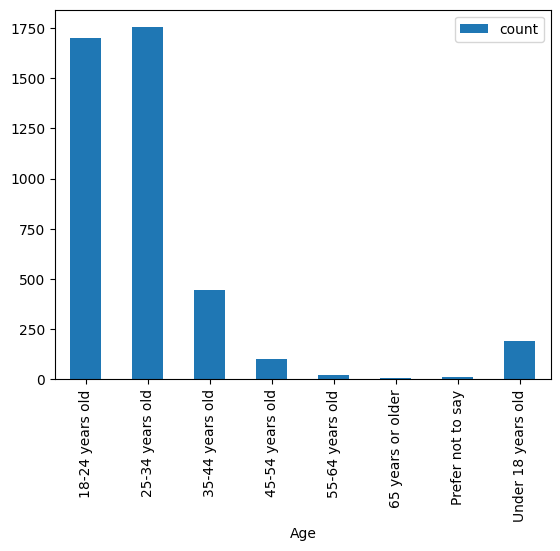

In [16]:
df.groupby("Age")["Age"].agg(["count"]).plot.bar()

- To analyse the proffession intrest and background of those developers

In [17]:
df.groupby("Employment")["Employment"].count()

# Number of employed developers

total_emplyed_devs_mask = df["Employment"].str.contains("Employed")
total_emplyed_devs = df.loc[total_emplyed_devs_mask, "Employment"].count()

print(f"There a {total_emplyed_devs} devs who are employed in some or other manner")

# Total number of student's in our dev community

student_devs_mask = df["Employment"].str.contains("Student")
total_student_devs = df.loc[student_devs_mask].shape[0]

print(f"There are {total_student_devs} students in Indian developers community")

# Total number of employed students

total_employed_studs = df.loc[student_devs_mask & total_emplyed_devs_mask].shape[0]

print(
    f"There are {total_employed_studs} students who are employed in some or other manner"
)

There a 2830 devs who are employed in some or other manner
There are 935 students in Indian developers community
There are 127 students who are employed in some or other manner


Average compensation of Indian devs is 48921930380.79304
Median compensation of Indian devs is 1300000.0


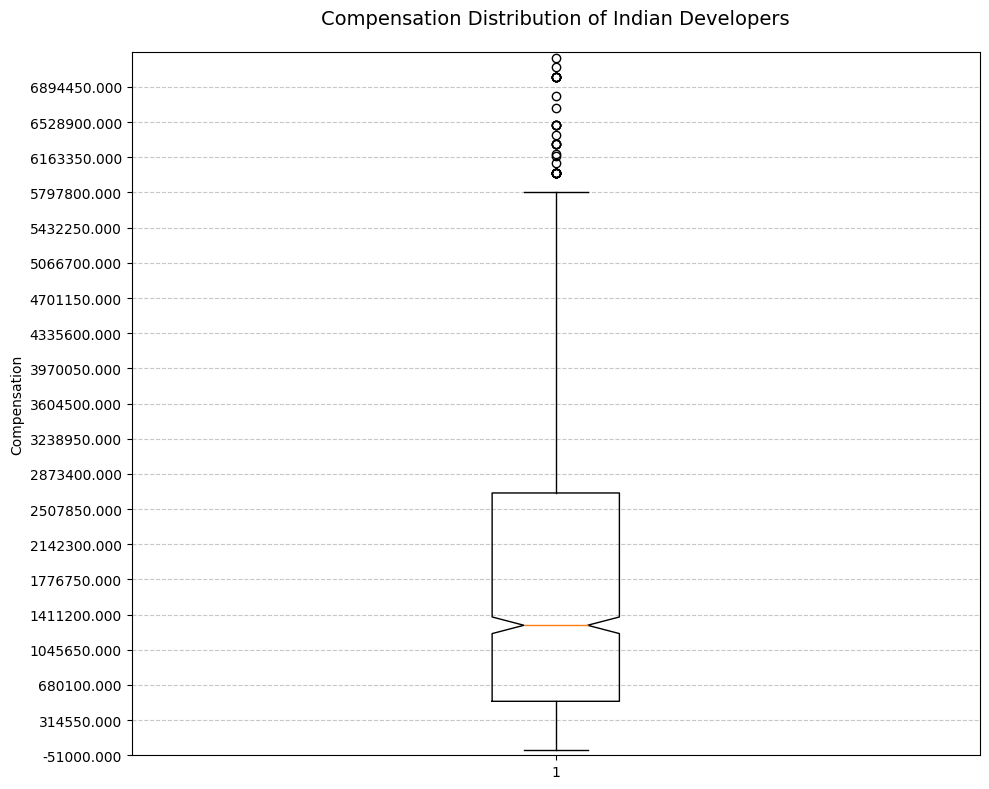

In [30]:
average_comp = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].mean()
median_comp = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].median()
max_comp = df["CompTotal"].max()
min_comp = df["CompTotal"].min()

print(f"Average compensation of Indian devs is {average_comp}")
print(f"Median compensation of Indian devs is {median_comp}")

# Create figure w
plt.figure(figsize=(10, 8))

# Create boxplot
boxplot = plt.boxplot(
    df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"], notch=True, manage_ticks=True
)

q1 = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].quantile(0.25)
q3 = df.loc[~pd.isnull(df["CompTotal"])]["CompTotal"].quantile(0.75)
iqr = q3 - q1

# Set y-axis limits with some padding
y_min = (
    max(0, q1 - 1.5 * iqr) - q1 / 10
)  # i've just increased the y-axis in -ve dirction by seperating value from it
y_max = q3 + 1.5 * iqr + q3 / 2

plt.ylim(y_min, y_max)

tick_values = np.arange(y_min, y_max, (y_max - y_min) / 20)

# convert the values to normal notation from scientific notation
tick_labels = [f"{int(x):.3f}" for x in tick_values]

# Create more ticks within the new range ad label
plt.yticks(tick_values, tick_labels)

# Add grid for better readability
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add labels and title
plt.title("Compensation Distribution of Indian Developers", fontsize=14, pad=20)
plt.ylabel("Compensation")

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [ ]:

to_plot = df.groupby(["DevType"])["DevType"].agg("count")
to_plot.index = [textwrap.fill(label,width=15) for label in to_plot.index]
to_plot.sort_values(ascending=True,inplace=True)

plt.figure(figsize=(8,12))
ax = to_plot.tail(10).plot(kind="barh")
plt.xlabel("No of Devs",fontsize=12)
plt.ylabel("Profession",fontsize=12)
plt.title("Profession distribution of Indian Devs", fontsize=15,pad=5)
plt.grid(axis="x",linestyle="--")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=8,label_type="center",color="red")
# We can see that the most of the developers in India are fullstack developers

### Distribution of Indian students among developers

Index(['18-24\nyears old', '25-34\nyears old', '35-44\nyears old',
       '45-54\nyears old', '55-64\nyears old', '65 years\nor older',
       'Prefer not\nto say', 'Under 18\nyears old'],
      dtype='object')


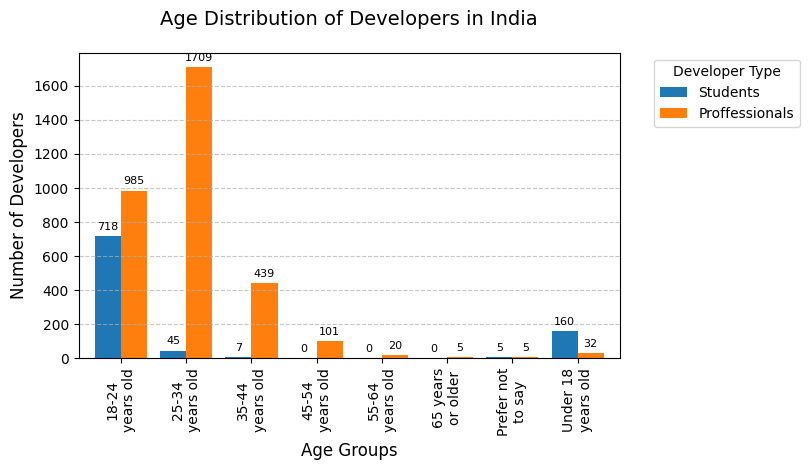

<Figure size 1000x800 with 0 Axes>

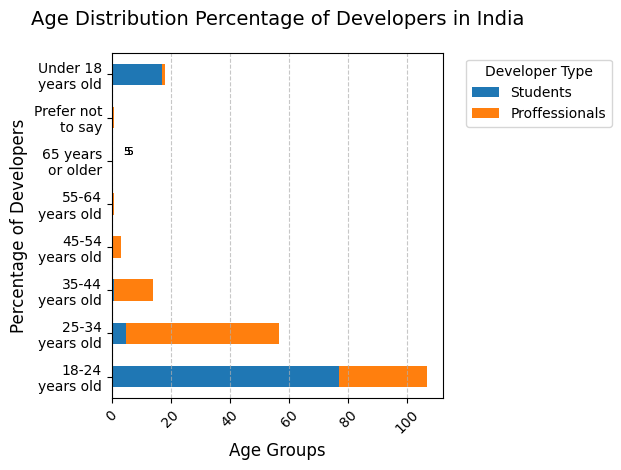

In [20]:
def age_distribution(df: pd.DataFrame):
    temp_data: pd.DataFrame = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student", case=False)

    age_dist = pd.DataFrame(
        {
            "Students": temp_data.loc[temp_data["IsStudent"], "Age"].value_counts(),
            "Proffessionals": temp_data.loc[
                ~temp_data["IsStudent"], "Age"
            ].value_counts(),
        }
    ).fillna(0)

    age_dist.index = [textwrap.fill(label,width=10) for label in age_dist.index]
    print(age_dist.index)

    age_dist_percentage = age_dist.div(age_dist.sum()) * 100

    ax = age_dist.plot.bar(width=0.8)

    plt.title("Age Distribution of Developers in India", fontsize=14, pad=20)
    plt.xlabel("Age Groups", fontsize=12)
    plt.ylabel("Number of Developers", fontsize=12)

    # plt.xticks(rotation=45)

    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()

    plt.legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")

    # adding info about the Total Number of devs just above the bar
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", padding=3, fontsize=8)

    plt.figure(figsize=(10, 8))

    ax2 = age_dist_percentage.plot.barh(stacked=True)
    plt.grid(axis="x", linestyle="--",alpha=0.7)

    plt.title("Age Distribution Percentage of Developers in India", fontsize=14, pad=20)
    plt.xlabel("Age Groups", fontsize=12)
    plt.ylabel("Percentage of Developers", fontsize=12)

    for containers in ax2.containers:
        ax2.bar_label(container, fmt="%.0f", padding=3, fontsize=8)

    plt.legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.xticks(rotation=45)

    plt.tight_layout()


age_distribution(df)

## Demograhics and education

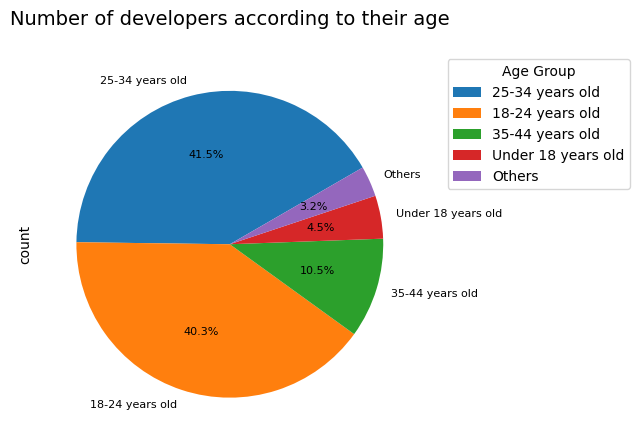

In [21]:
# Age distribution of Indian devs in pie chart

people_in_age_grp = df.loc[:, "Age"].value_counts()
top_4_age_grp = people_in_age_grp[:4]
marginal_numbers_total = people_in_age_grp[4:].sum()
top_4_age_grp["Others"] = marginal_numbers_total

plt.title("Number of developers according to their age", fontsize=14, pad=20)
plt.tight_layout()


ax = top_4_age_grp.plot.pie(autopct="%1.1f%%", startangle=30, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, fontsize=8)

plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

### Education background of Indian devs, from where they learned to code
- What online and offline materials do devs use to learn to code
- What online and offline materials do students use to learn to code
- How many student refer documentation while learning to code

In [75]:
# adding a IsStudent colum to avoid reduntat boolean indexing

Is_student = df["Employment"].str.contains("Student", case=False)
df["Is_student"] = Is_student

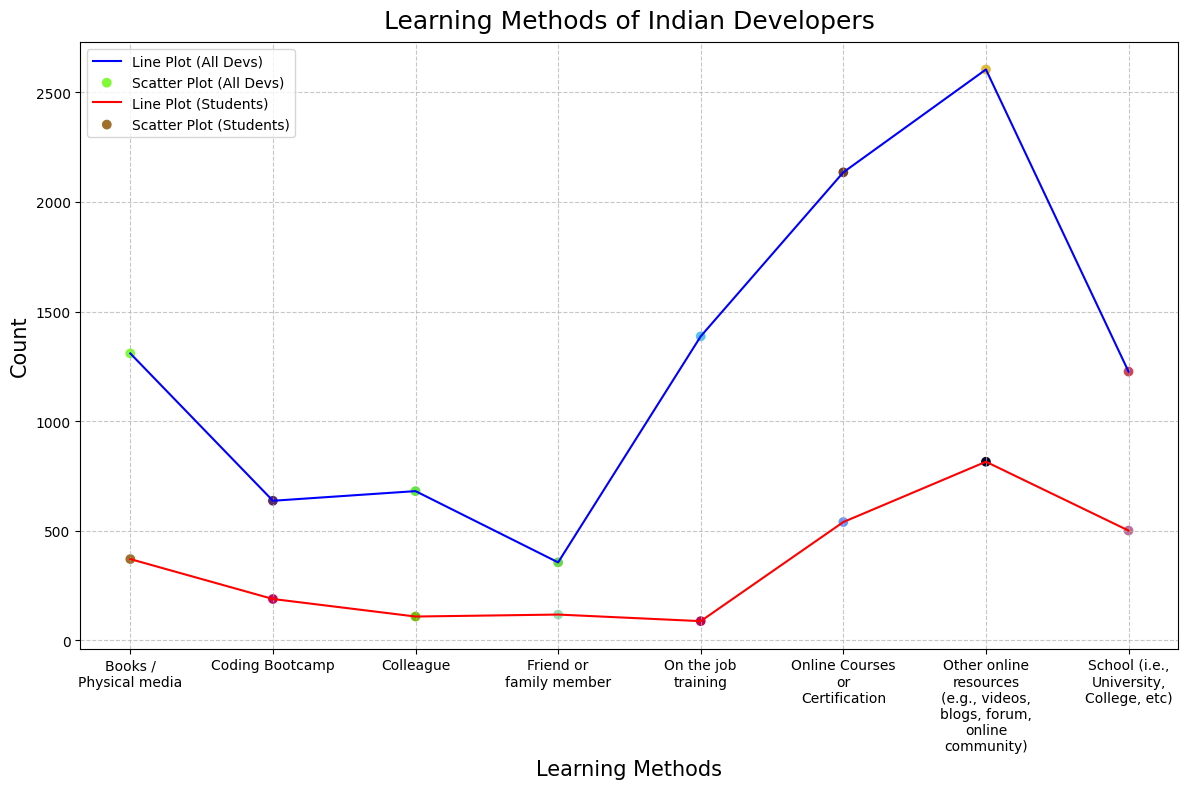

In [76]:
# How do all the devs learn to code

learning_methods = df.loc[~df["Is_student"],"LearnCode"].str.split(";").explode().value_counts()[:-1]
learning_methods_stud = (
    df.loc[df["Employment"].str.contains("Student", case=False)]["LearnCode"]
    .str.split(";")
    .explode()
    .value_counts()[:-1]
)

common_labels = learning_methods.index.union(learning_methods_stud.index)
learning_methods = learning_methods.reindex(common_labels, fill_value=0)
learning_methods_stud = learning_methods_stud.reindex(common_labels, fill_value=0)

# Wrapping labels for better readability
wrapped_labels = [textwrap.fill(label, width=15) for label in common_labels]

# Generating random colors
colors1 = np.random.rand(len(common_labels), 3)
colors2 = np.random.rand(len(common_labels), 3)

# Plotting
plt.figure(figsize=(12, 8))

# All developers
plt.plot(
    wrapped_labels, learning_methods.values, label="Line Plot (All Devs)", color="blue"
)
plt.scatter(
    wrapped_labels, learning_methods.values, c=colors1, label="Scatter Plot (All Devs)"
)

# Student developers
plt.plot(
    wrapped_labels,
    learning_methods_stud.values,
    label="Line Plot (Students)",
    color="red",
)
plt.scatter(
    wrapped_labels,
    learning_methods_stud.values,
    c=colors2,
    label="Scatter Plot (Students)",
)


# Adding labels, title, and grid
plt.xlabel("Learning Methods", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Learning Methods of Indian Developers", pad=10, fontsize=18)
plt.grid(linestyle="--", alpha=0.7)

# Adding legend
plt.legend()

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()

##### How many stdents refer to documentation while learning to code

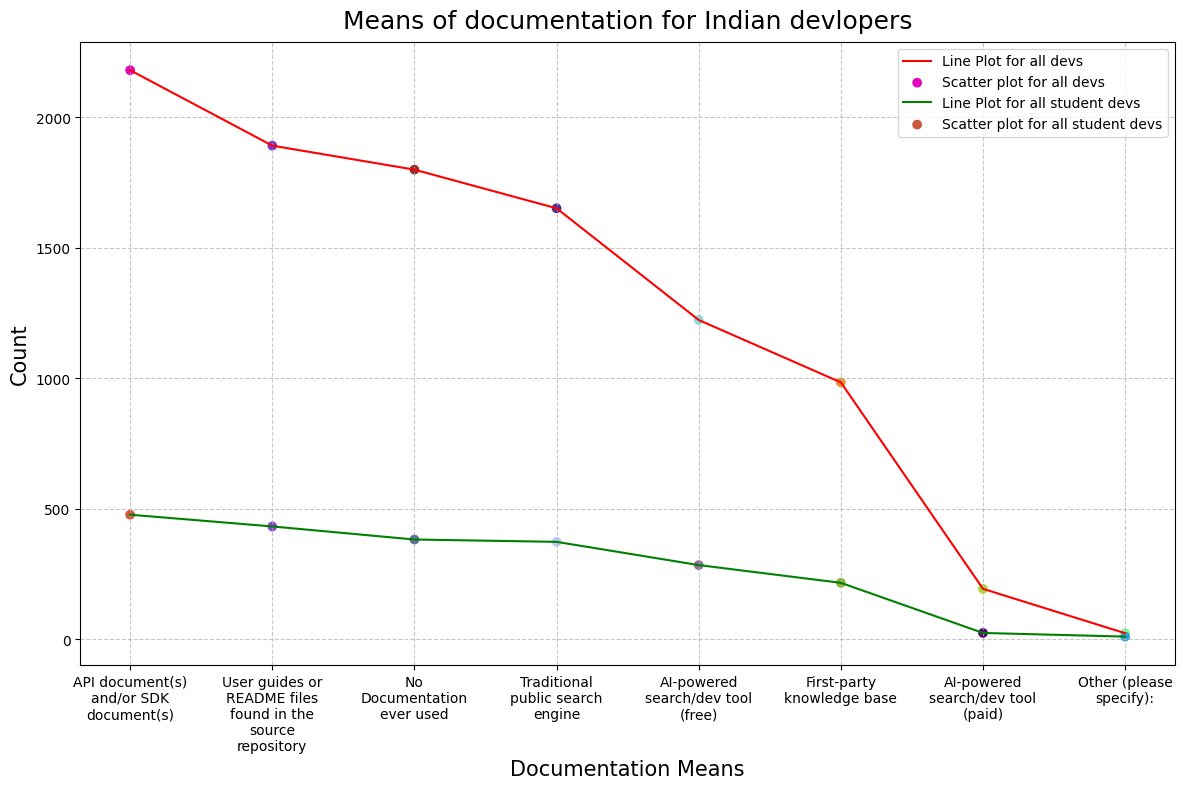

In [77]:
value_count_of_techdoc_all_devs = df.TechDoc.str.split(";").explode().value_counts()
value_count_of_techdoc_all_studs = (
    df[df["Is_student"]].TechDoc.str.split(";").explode().value_counts()
)
common_labels = value_count_of_techdoc_all_devs.index.union(
    value_count_of_techdoc_all_studs.index
)
value_count_of_techdoc_all_devs.reindex(common_labels)
value_count_of_techdoc_all_studs.reindex(common_labels)

common_labels = [textwrap.fill(label, width=15) for label in common_labels]

colors1 = np.random.rand(len(common_labels), 3)
colors2 = np.random.rand(len(common_labels), 3)

plt.figure(figsize=(12, 8))

# plot of devs
plt.plot(
    common_labels,
    value_count_of_techdoc_all_devs.values,
    color="Red",
    label="Line Plot for all devs",
)
plt.scatter(
    common_labels,
    value_count_of_techdoc_all_devs.values,
    c=colors1,
    label="Scatter plot for all devs",
)

# plot of students
plt.plot(
    common_labels,
    value_count_of_techdoc_all_studs.values,
    color="Green",
    label="Line Plot for all student devs",
)
plt.scatter(
    common_labels,
    value_count_of_techdoc_all_studs.values,
    c=colors2,
    label="Scatter plot for all student devs",
)

# Adding labels, title, and grid
plt.xlabel("Documentation Means", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Means of documentation for Indian devlopers", pad=10, fontsize=18)
plt.grid(linestyle="--", alpha=0.7)

# Adding legend
plt.legend()

# Adjusting layout
plt.tight_layout()

# Show plot
plt.show()

## Technology and Skills
1. What programming languages, tools, and frameworks are most popular among Indian developers?
2. Which technologies are Indian developers most interested in learning?
3. What percentage of Indian developers work on open-source projects?
4. Most Used Web Framework withing India Developers

- ### Indian devs and open source 


In [25]:
total_number_of_oss_devs = (
    df["CodingActivities"].str.contains("open-source", case=False, na=False).sum()
)
total_number_of_oss_studs = (
    df.loc[df["Is_student"], "CodingActivities"]
    .str.contains("open-source", case=False, na=False)
    .sum()
)

print(
    f"Total Number of Devs involed in Open source {total_number_of_oss_devs}",
    f"Total Number of Students involed in Open source {total_number_of_oss_studs}",
    sep="\n",
)

print(
    f"Only {(total_number_of_oss_studs/total_number_of_oss_devs) * 100:.2f}% of Open source contributors from India are student"
)

Total Number of Devs involed in Open source 916
Total Number of Students involed in Open source 83
Only 9.06% of Open source contributors from India are student


- ### What programming languages, tools, and frameworks are most popular among Indian developers?

#### Programming Languages

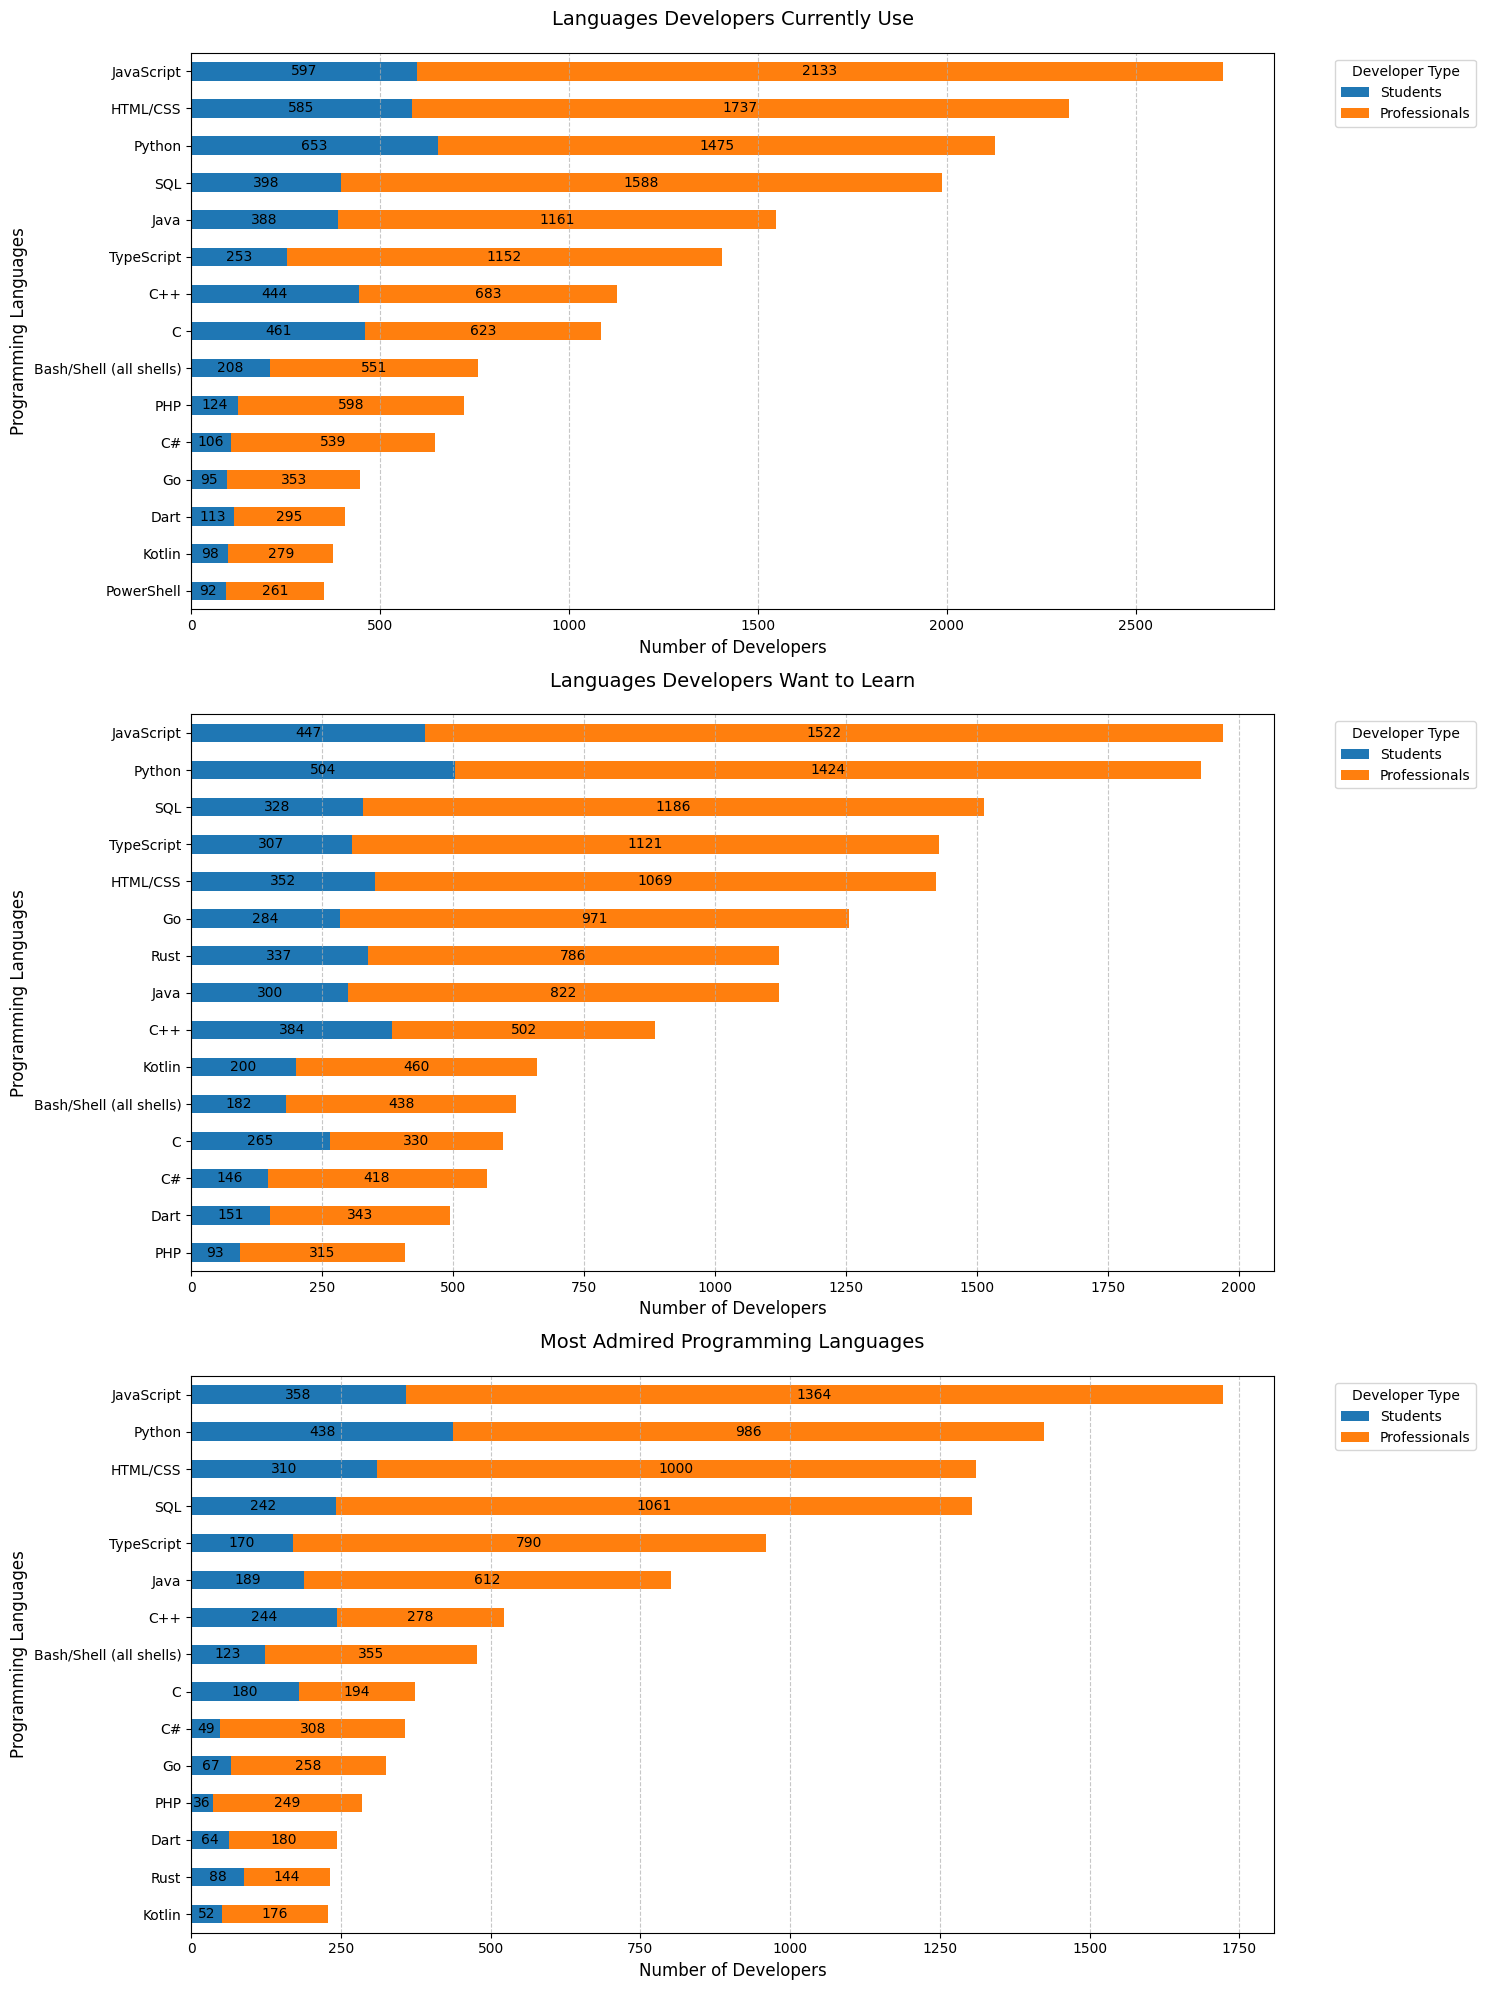

In [26]:
def language_distribution(df: pd.DataFrame) -> matplotlib.figure.Figure:
    # create a copy of the DataFrame and identify students
    temp_data = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student", case=False)
    
    # create DataFrames for each category
    categories = {
        "Languages Currently Used": ("LanguageHaveWorkedWith", "Languages Developers Currently Use"),
        "Languages Want to Learn": ("LanguageWantToWorkWith", "Languages Developers Want to Learn"),
        "Languages Admired": ("LanguageAdmired", "Most Admired Programming Languages")
    }
    
    # create figure and subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    
    # process each category
    for idx, (category, (column, title)) in enumerate(categories.items()):
        # calculate distributions
        data = pd.DataFrame({
            "Students": temp_data.loc[temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts(),
            "Professionals": temp_data.loc[~temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts()
        }).fillna(0)
        
        # sort by total usage (students + professionals)
        data['Total'] = data.sum(axis=1)
        data = data.sort_values('Total', ascending=True).drop('Total', axis=1)
        
        # keeping top 15 languages for better readability
        data = data.tail(15)
        
        # Create stacked bar plot
        ax = data.plot(kind='barh', stacked=True, ax=axes[idx])
        
        axes[idx].set_title(title, fontsize=14, pad=20)
        axes[idx].set_xlabel("Number of Developers", fontsize=12)
        axes[idx].set_ylabel("Programming Languages", fontsize=12)
        
        # add grid
        axes[idx].grid(axis="x", linestyle="--", alpha=0.7)
        
        axes[idx].legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
        
        # add value labels on bars
        for c in ax.containers:
            # Only show value if it's greater than 0
            ax.bar_label(c, fmt='%.0f', label_type='center')
            
    plt.tight_layout()
    return fig

fig = language_distribution(df)

#### Web Frameworks

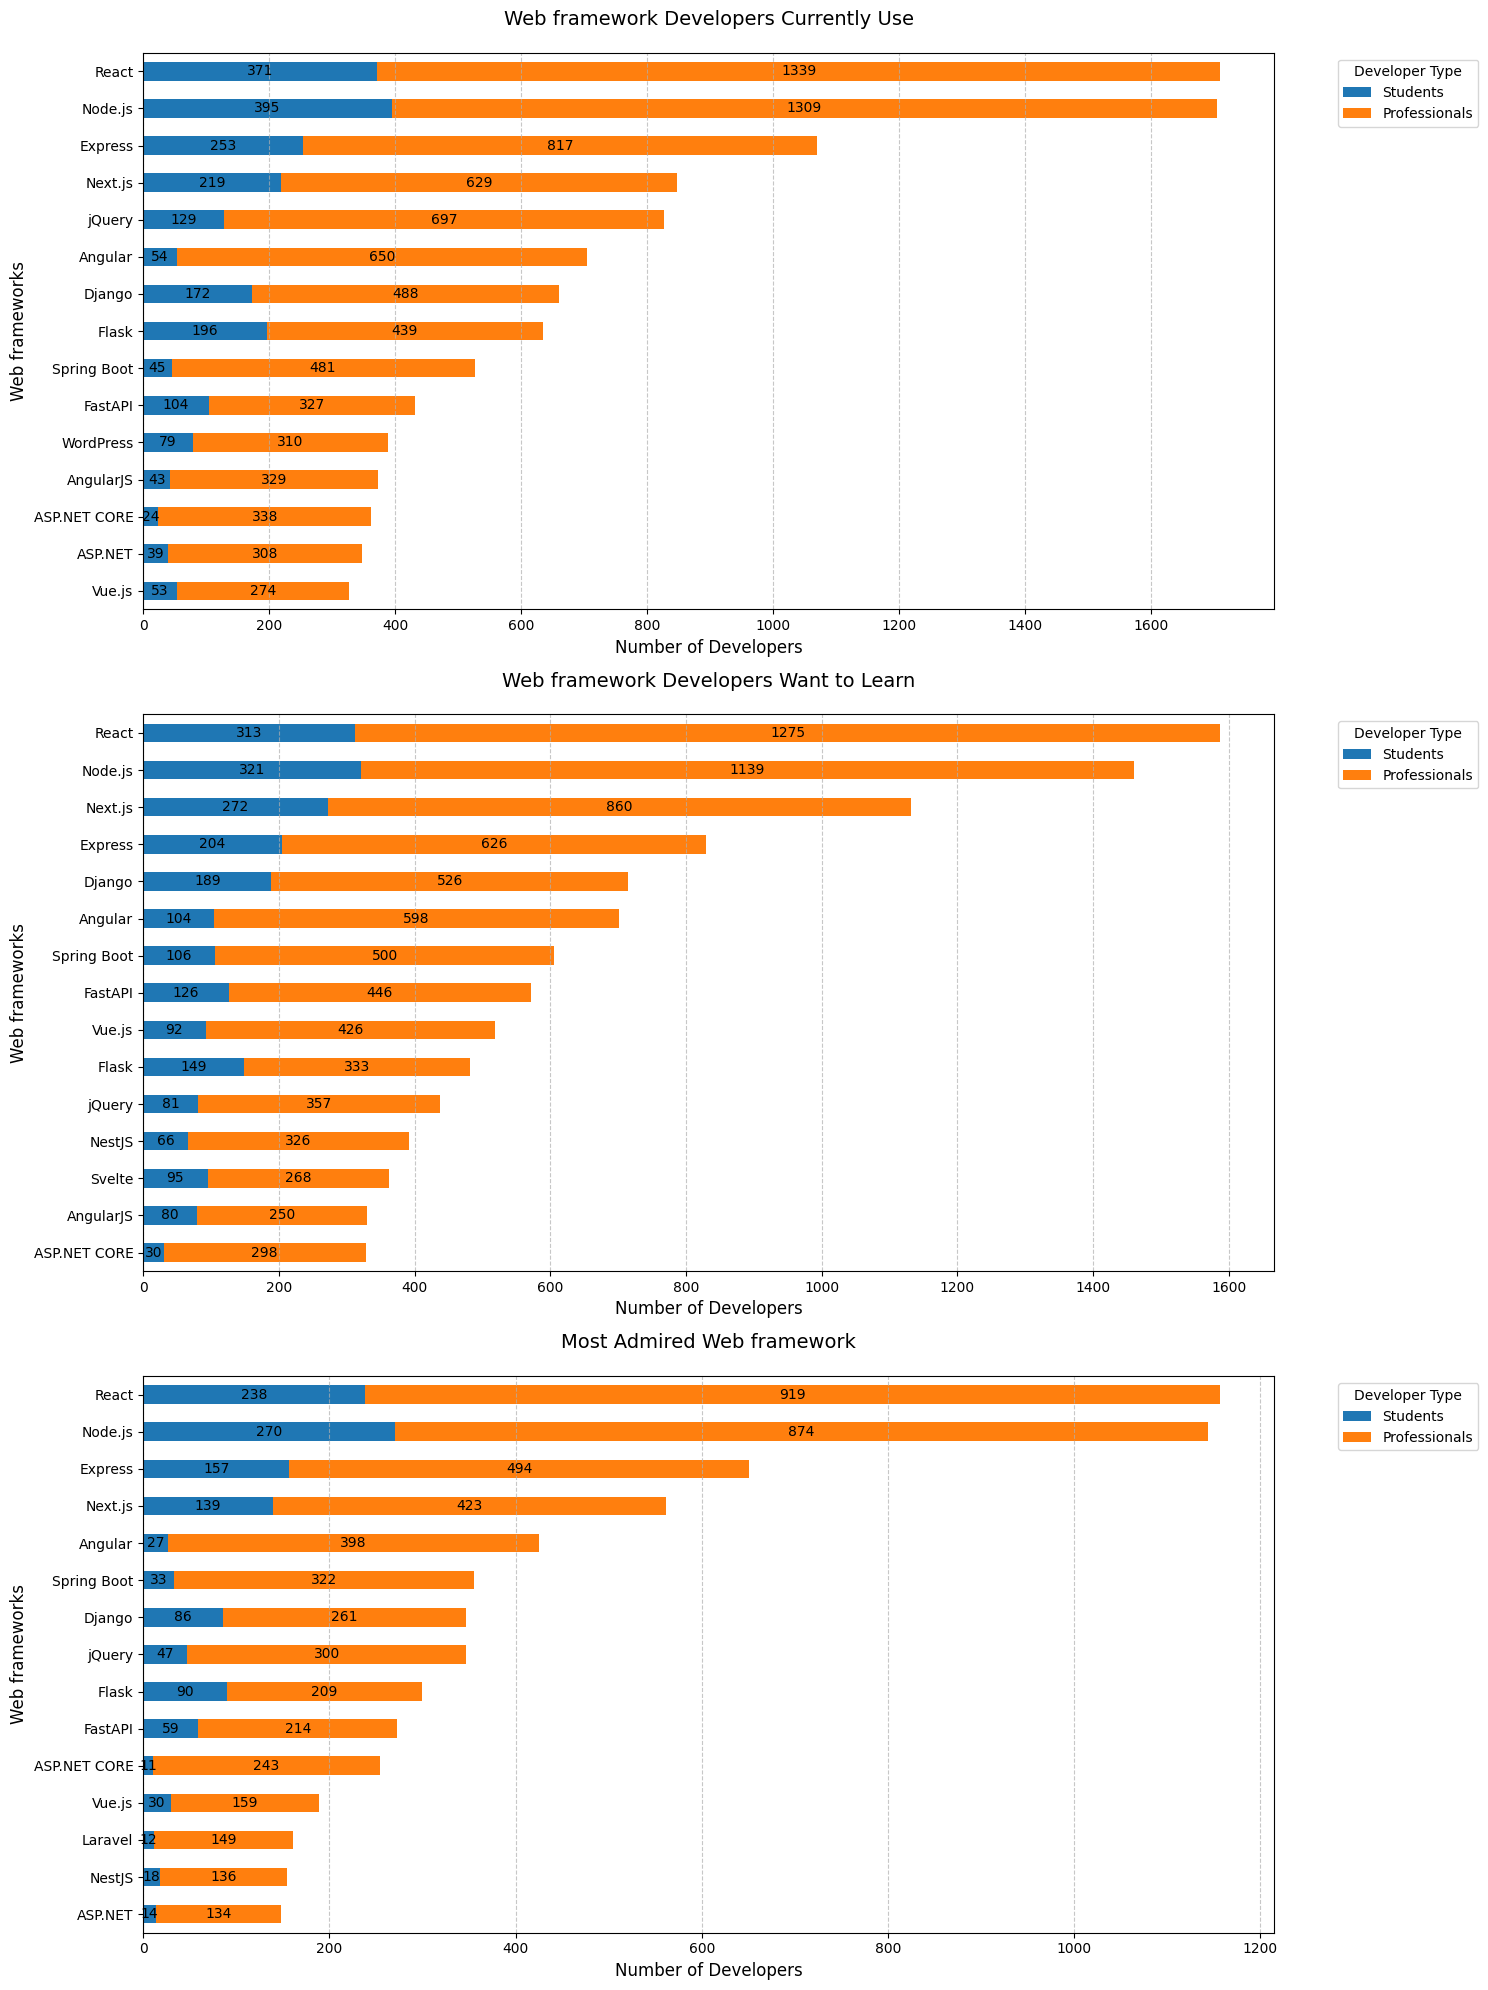

In [27]:
def webframework_distribution(df: pd.DataFrame) -> matplotlib.figure.Figure:
    # create a copy of the DataFrame and identify students
    temp_data = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student", case=False)
    
    # create DataFrames for each category
    categories = {
        "Web framework Currently Used": ("WebframeHaveWorkedWith", "Web framework Developers Currently Use"),
        "Web framework Want to Learn": ("WebframeWantToWorkWith", "Web framework Developers Want to Learn"),
        "Web framework Admired": ("WebframeAdmired", "Most Admired Web framework")
    }
    
    # create figure and subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    
    # process each category
    for idx, (category, (column, title)) in enumerate(categories.items()):
        # calculate distributions
        data = pd.DataFrame({
            "Students": temp_data.loc[temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts(),
            "Professionals": temp_data.loc[~temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts()
        }).fillna(0)
        
        # sort by total usage (students + professionals)
        data['Total'] = data.sum(axis=1)
        data = data.sort_values('Total', ascending=True).drop('Total', axis=1)
        
        # keeping top 15 languages for better readability
        data = data.tail(15)
        
        # Create stacked bar plot
        ax = data.plot(kind='barh', stacked=True, ax=axes[idx])
        
        axes[idx].set_title(title, fontsize=14, pad=20)
        axes[idx].set_xlabel("Number of Developers", fontsize=12)
        axes[idx].set_ylabel("Web frameworks", fontsize=12)
        
        # add grid
        axes[idx].grid(axis="x", linestyle="--", alpha=0.7)
        
        axes[idx].legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
        
        # add value labels on bars
        for c in ax.containers:
            # Only show value if it's greater than 0
            ax.bar_label(c, fmt='%.0f', label_type='center')
            
    plt.tight_layout()
    return fig

fig = webframework_distribution(df)

#### Dev tools

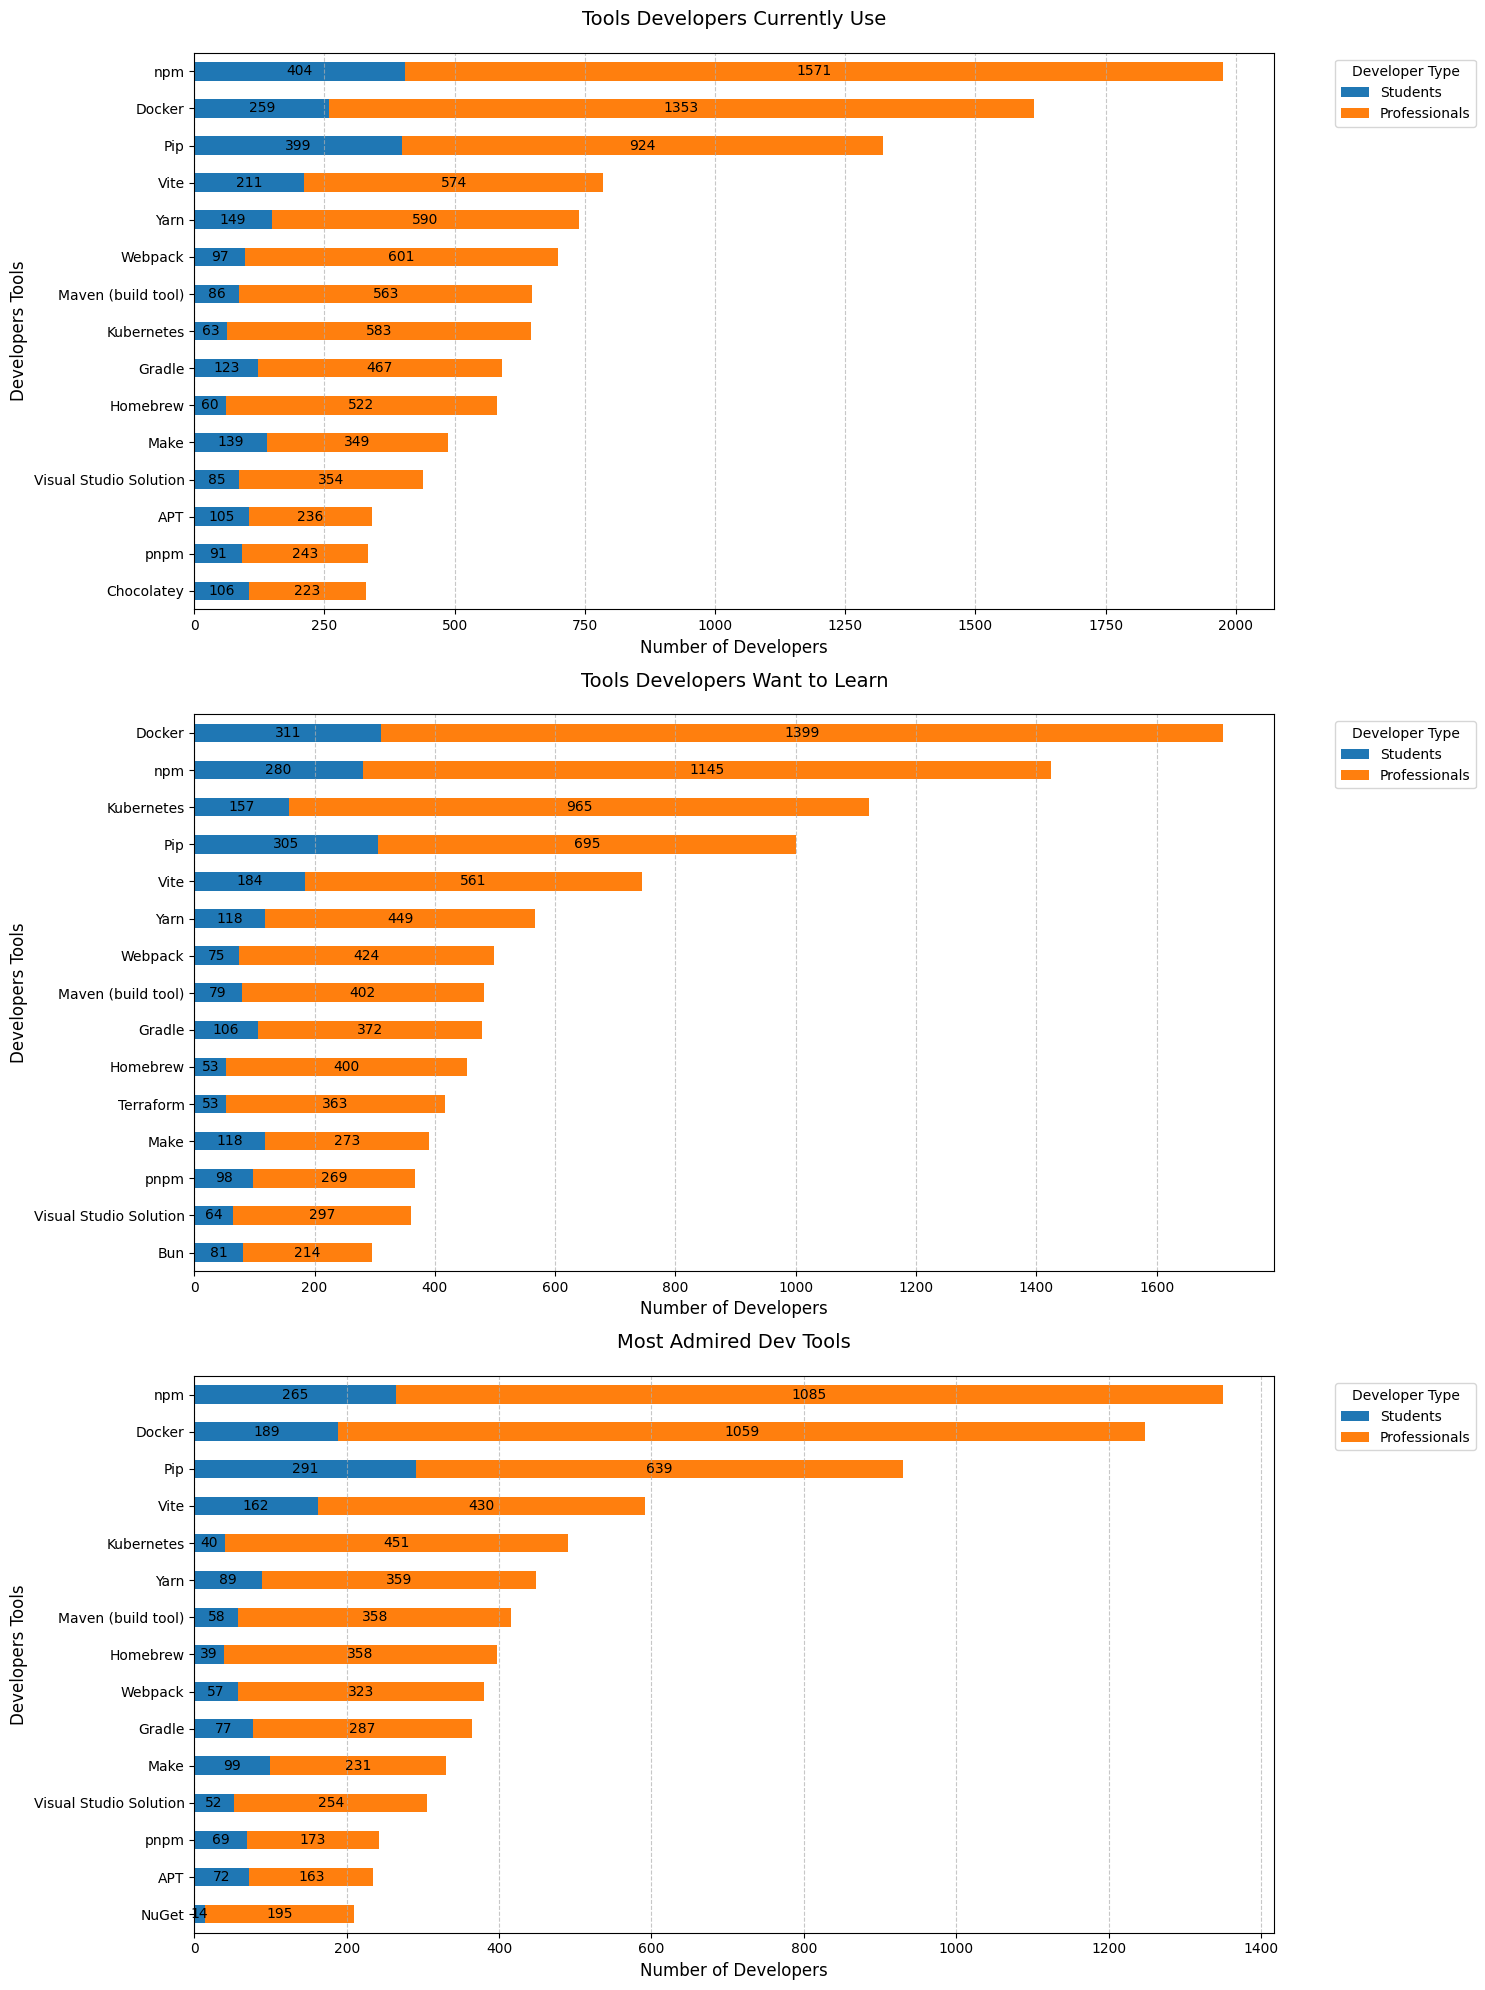

In [28]:
def dev_tools_distribution(df: pd.DataFrame) -> matplotlib.figure.Figure:
    # create a copy of the DataFrame and identify students
    temp_data = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student", case=False)
    
    # create DataFrames for each category
    categories = {
        "Dev Tools Currently Used": ("ToolsTechHaveWorkedWith", "Tools Developers Currently Use"),
        "Dev Tools Want to Learn": ("ToolsTechWantToWorkWith", "Tools Developers Want to Learn"),
        "Dev Tools Admired": ("ToolsTechAdmired", "Most Admired Dev Tools")
    }
    
    # create figure and subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    
    # process each category
    for idx, (category, (column, title)) in enumerate(categories.items()):
        # calculate distributions
        data = pd.DataFrame({
            "Students": temp_data.loc[temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts(),
            "Professionals": temp_data.loc[~temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts()
        }).fillna(0)
        
        # sort by total usage (students + professionals)
        data['Total'] = data.sum(axis=1)
        data = data.sort_values('Total', ascending=True).drop('Total', axis=1)
        
        # keeping top 15 languages for better readability
        data = data.tail(15)
        
        # Create stacked bar plot
        ax = data.plot(kind='barh', stacked=True, ax=axes[idx])
        
        axes[idx].set_title(title, fontsize=14, pad=20)
        axes[idx].set_xlabel("Number of Developers", fontsize=12)
        axes[idx].set_ylabel("Developers Tools", fontsize=12)
        
        # add grid
        axes[idx].grid(axis="x", linestyle="--", alpha=0.7)
        
        axes[idx].legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
        
        # add value labels on bars
        for c in ax.containers:
            # Only show value if it's greater than 0
            ax.bar_label(c, fmt='%.0f', label_type='center')
            
    plt.tight_layout()
    return fig

fig = dev_tools_distribution(df)

### IDE's and collab tools

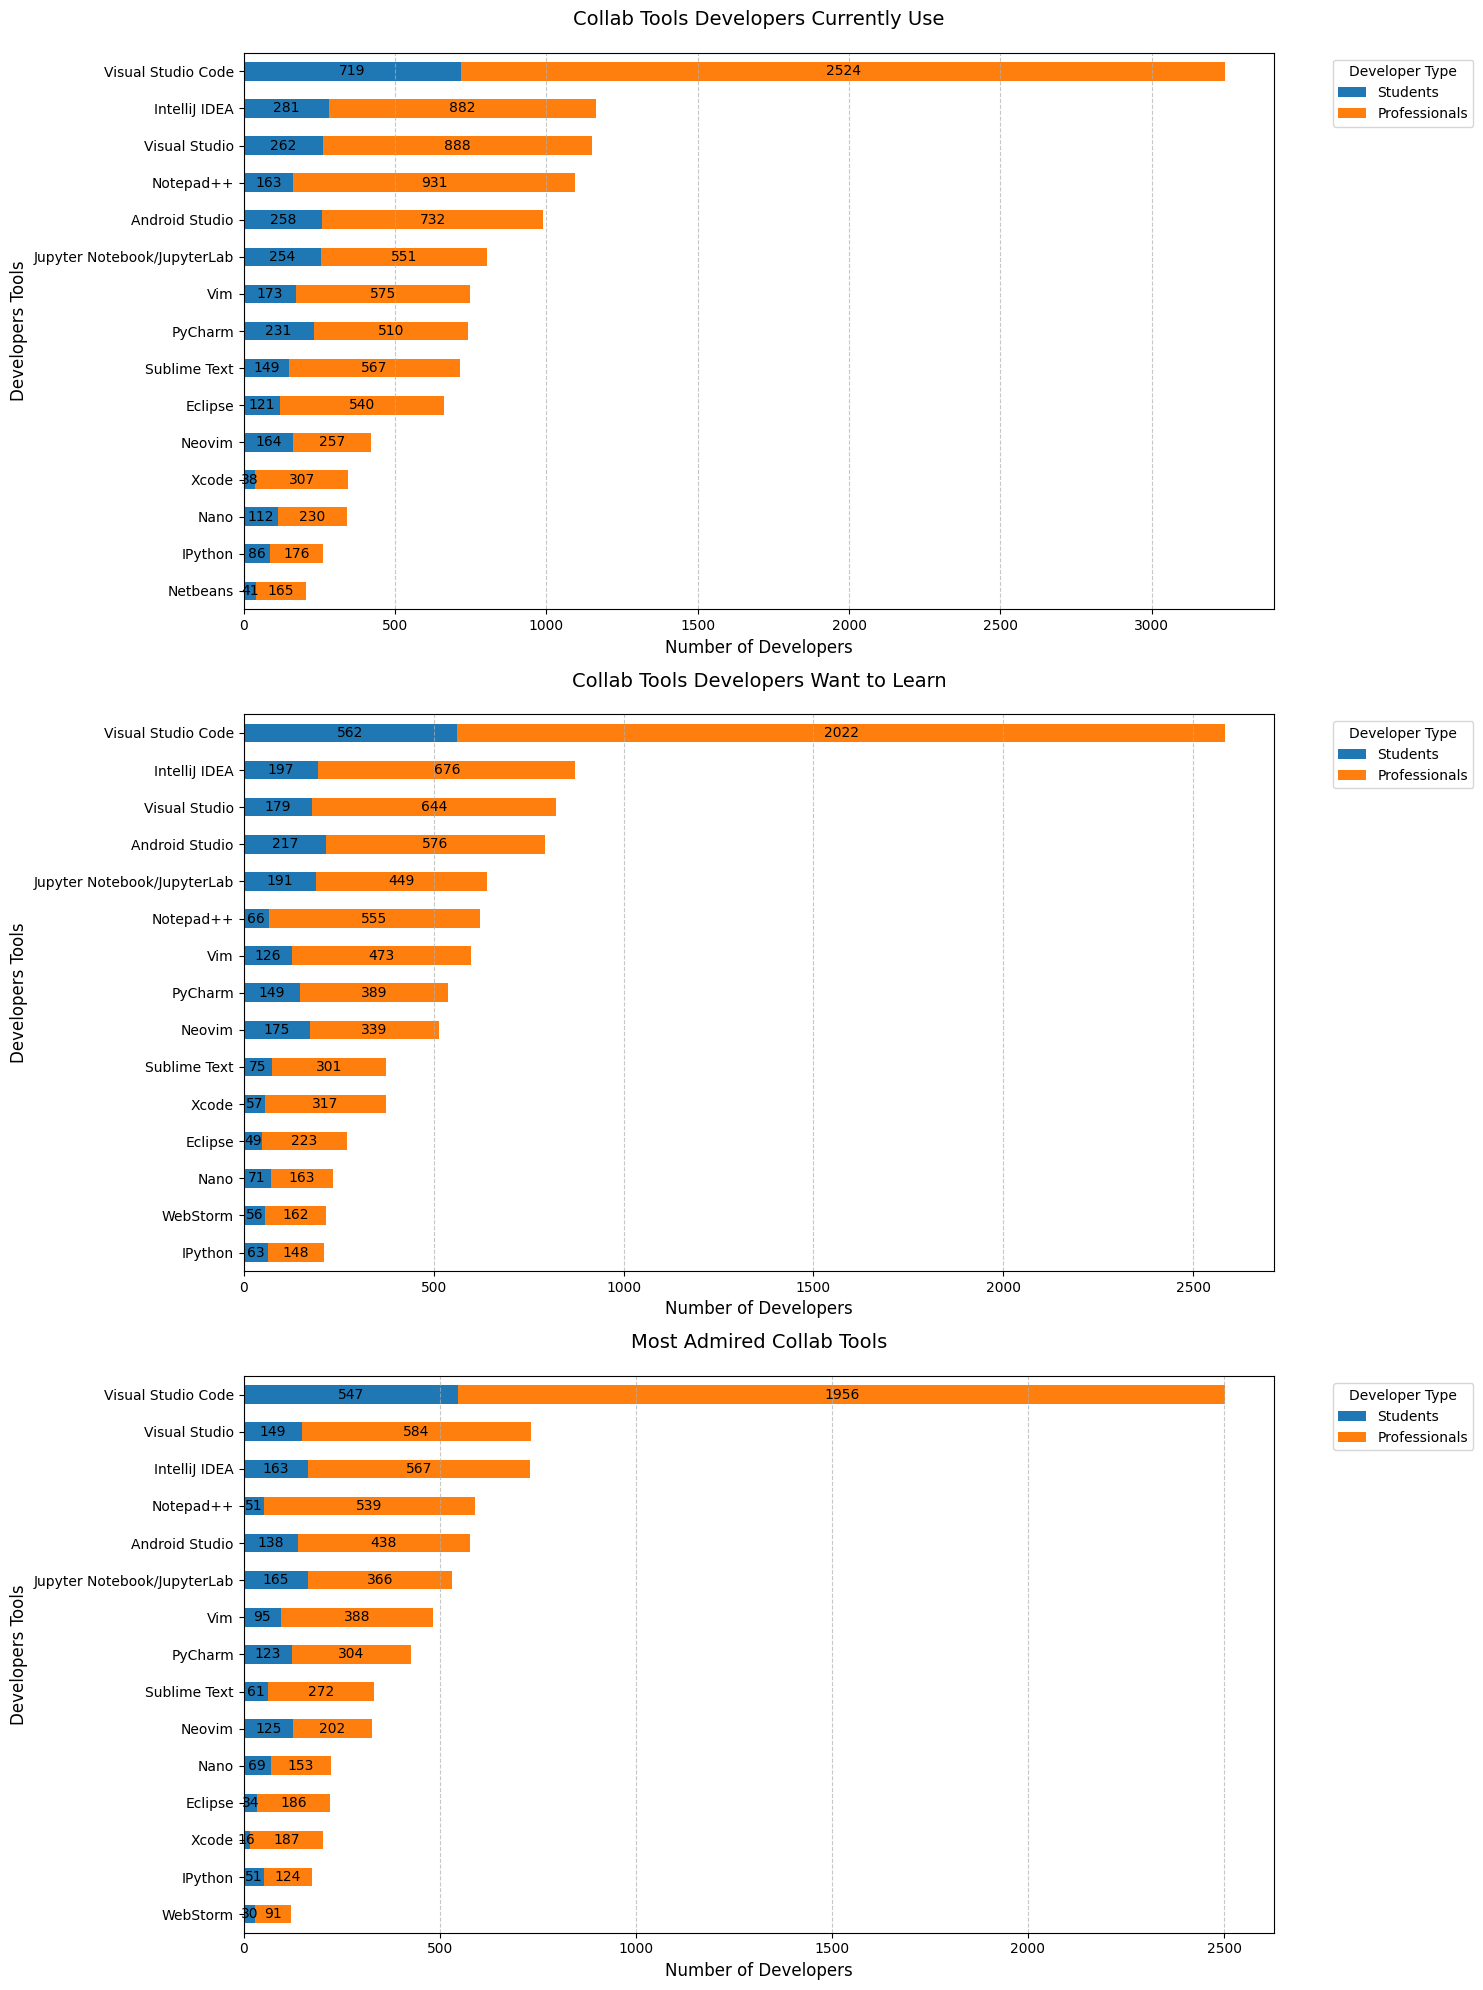

In [29]:
def collab_tools_distribution(df: pd.DataFrame) -> matplotlib.figure.Figure:
    # create a copy of the DataFrame and identify students
    temp_data = df.copy()
    temp_data["IsStudent"] = temp_data["Employment"].str.contains("Student", case=False)
    
    # create DataFrames for each category
    categories = {
        "Collab Tools Currently Used": ("NEWCollabToolsHaveWorkedWith", "Collab Tools Developers Currently Use"),
        "Collab Tools Want to Learn": ("NEWCollabToolsWantToWorkWith", "Collab Tools Developers Want to Learn"),
        "Collab Tools Admired": ("NEWCollabToolsAdmired", "Most Admired Collab Tools")
    }
    
    # create figure and subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    
    # process each category
    for idx, (category, (column, title)) in enumerate(categories.items()):
        # calculate distributions
        data = pd.DataFrame({
            "Students": temp_data.loc[temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts(),
            "Professionals": temp_data.loc[~temp_data["IsStudent"], column]
                .str.split(";").explode().value_counts()
        }).fillna(0)
        
        # sort by total usage (students + professionals)
        data['Total'] = data.sum(axis=1)
        data = data.sort_values('Total', ascending=True).drop('Total', axis=1)  
              
        # keeping top 15 languages for better readability
        data = data.tail(15)
        
        # Create stacked bar plot
        ax = data.plot(kind='barh', stacked=True, ax=axes[idx])
        
        axes[idx].set_title(title, fontsize=14, pad=20)
        axes[idx].set_xlabel("Number of Developers", fontsize=12)
        axes[idx].set_ylabel("Developers Tools", fontsize=12)
        
        # add grid
        axes[idx].grid(axis="x", linestyle="--", alpha=0.7)
        
        axes[idx].legend(title="Developer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
        
        # add value labels on bars
        for c in ax.containers:
            # Only show value if it's greater than 0
            ax.bar_label(c, fmt='%.0f', label_type='center')
            
    plt.tight_layout()
    return fig

fig = collab_tools_distribution(df)